# Demo Preprocessing
Because the structure is not perfect and the quality of the aquired images is not as planned, we can apply some preprocessing to align back the images to the original planned camera positions. That is:
- Make the object vertical (through PCA)
- Align top voxel on every image (centering)

## Imports
Main functions will be stored in `src.preprocessing`

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from src.utils import load_scans
from src.scans import Scans
from src.preprocessing import get_object_orientation, fix_jitter

scans = Scans("./figures/demo/segmented")

# 1. Vertical Alignement
The first step would be to extract the PCA of the image and re-align the axis to the image axis

In [2]:
mask = scans.scan(0)
centroid, eigvals, eigvecs = get_object_orientation(mask)

# Principal axis direction:
principal_axis = eigvecs[:, 0]

print("Centroid:", centroid)
print("Eigenvalues:", eigvals)
print("Principal axis:", principal_axis)


Centroid: [ 876.03742051 1167.1141133 ]
Eigenvalues: [30666.97240017  9961.15828267]
Principal axis: [-0.99952984 -0.03066091]


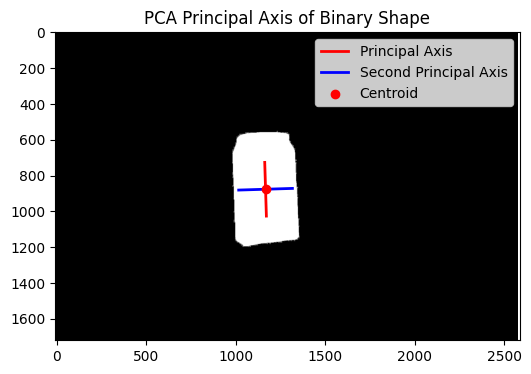

In [3]:
scale = 150
v = eigvecs[:, 0]   # Principal axis direction vector
p1 = centroid + scale * v
p2 = centroid - scale * v
v2 = eigvecs[:, 1]   # Second principal axis direction vector
p3 = centroid + scale * v2
p4 = centroid - scale * v2

plt.figure(figsize=(6, 4))
plt.imshow(mask, cmap="gray")

# Line endpoints (note: imshow uses (y,x) indexing)
plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'r-', linewidth=2, label="Principal Axis")
plt.plot([p3[1], p4[1]], [p3[0], p4[0]], 'b-', linewidth=2, label="Second Principal Axis")
plt.scatter([centroid[1]], [centroid[0]], c='red', label="Centroid", zorder=5)

# Plot second principal axis

plt.title("PCA Principal Axis of Binary Shape")
plt.legend()
plt.axis("equal")
plt.show()

In [4]:
aligned_mask, new_centroid, new_eigvecs = fix_jitter(mask)

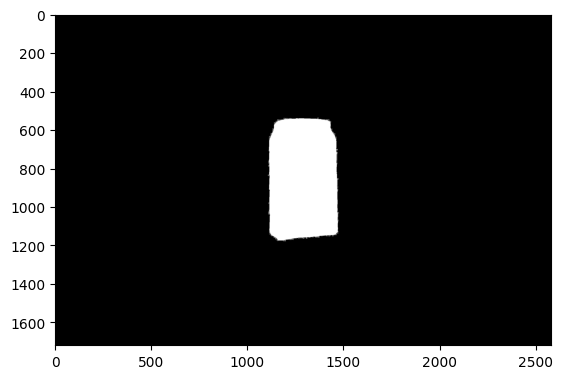

In [5]:
plt.imshow(aligned_mask, cmap='gray')

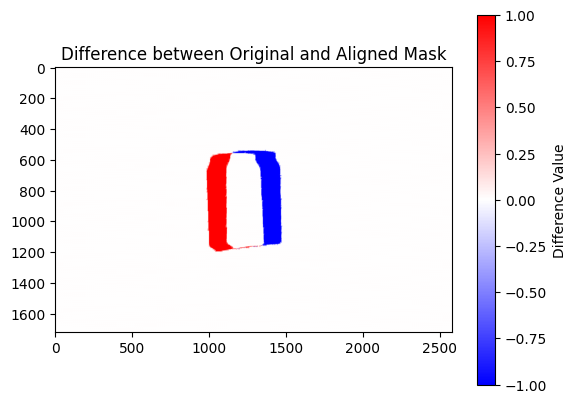

In [6]:
delta = mask.astype(int) - aligned_mask.astype(int)
plt.figure()
plt.imshow(delta, cmap='bwr', vmin=-1, vmax=1)
plt.title("Difference between Original and Aligned Mask")
plt.colorbar(label='Difference Value')
plt.show()